# Mapeamento de patentes

## Bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as pyo
from plotly.offline import iplot

pd.options.display.float_format = '{:.1f}'.format

### Banco limpo

In [2]:
# Exporte o DataFrame para o arquivo Excel
df = pd.read_excel('dados_patentes_longo_AM.xlsx')

df['data_publicacao'] = pd.to_datetime(df['data_publicacao'], format="%d/%m/%Y")
df['data_deposito'] = pd.to_datetime(df['data_deposito'], format="%d/%m/%Y")

df['ifes'] = df['ifes'].astype('category')
df['parceria'] = df['parceria'].astype('category')

# Extrair o ano, o mês e mês/ano
df['ano_dep'] = df['data_deposito'].dt.year
df['mes_dep'] = df['data_deposito'].dt.month
df['mes_ano_dep'] = df.apply(lambda x: f"{x['mes_dep']:02d}/{x['ano_dep']}", axis=1)
df['ano_dep'] = df['ano_dep'].astype('int')
df['mes_dep'] = df['mes_dep'].astype('int')
df['mes_ano_dep'] = df['mes_ano_dep'].astype('str')

print(df.head())
print(df.info)

        ID data_publicacao data_deposito  \
0  ID00001      2020-01-07    2013-06-27   
1  ID00001      2020-01-07    2013-06-27   
2  ID00001      2020-01-07    2013-06-27   
3  ID00001      2020-01-07    2013-06-27   
4  ID00001      2020-01-07    2013-06-27   

                                         titulo_inid              responsavel  \
0  APERFEIÇOAMENTO INTRODUZIDO EM PROCESSO DE REC...  ACM EL ORRA COLCHÕES ME   
1  APERFEIÇOAMENTO INTRODUZIDO EM PROCESSO DE REC...  ACM EL ORRA COLCHÕES ME   
2  APERFEIÇOAMENTO INTRODUZIDO EM PROCESSO DE REC...  ACM EL ORRA COLCHÕES ME   
3  APERFEIÇOAMENTO INTRODUZIDO EM PROCESSO DE REC...  ACM EL ORRA COLCHÕES ME   
4  APERFEIÇOAMENTO INTRODUZIDO EM PROCESSO DE REC...  ACM EL ORRA COLCHÕES ME   

  titular_UF parceria ifes ifes_abrev titular_pais   ipc  \
0         SP  Titular  Não        NaN           BR  B29B   
1         SP  Titular  Não        NaN           BR  B29B   
2         SP  Titular  Não        NaN           BR  B29B   
3       

### Exploração das datas

In [3]:
print(df["data_publicacao"].min())
print(df["data_publicacao"].max())

print(df["data_deposito"].min())
print(df["data_deposito"].max())

2020-01-07 00:00:00
2023-07-25 00:00:00
2003-05-20 00:00:00
2023-01-11 00:00:00


### Total de patentes depositadas no período

In [4]:
tab = df.groupby(['ano_dep'])['ID'].nunique().reset_index()
tab

,ano_dep,ID
0,2003,2
1,2007,4
2,2008,3
3,2009,7
4,2010,27
5,2011,37
6,2012,54
7,2013,33
8,2014,57
9,2015,48


In [5]:
tab = df.groupby('ifes').agg(n=('ID', 'nunique')).reset_index()
tab

C:\Users\DELL\AppData\Local\Temp\ipykernel_4332\2532168572.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,ifes,n
0,Não,21748
1,Sim,3779


### Distribuição do total de patentes depositadas entre 20/05/2003 e 11/01/2023 por participação de IFEs

C:\Users\DELL\AppData\Local\Temp\ipykernel_4332\2251989035.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



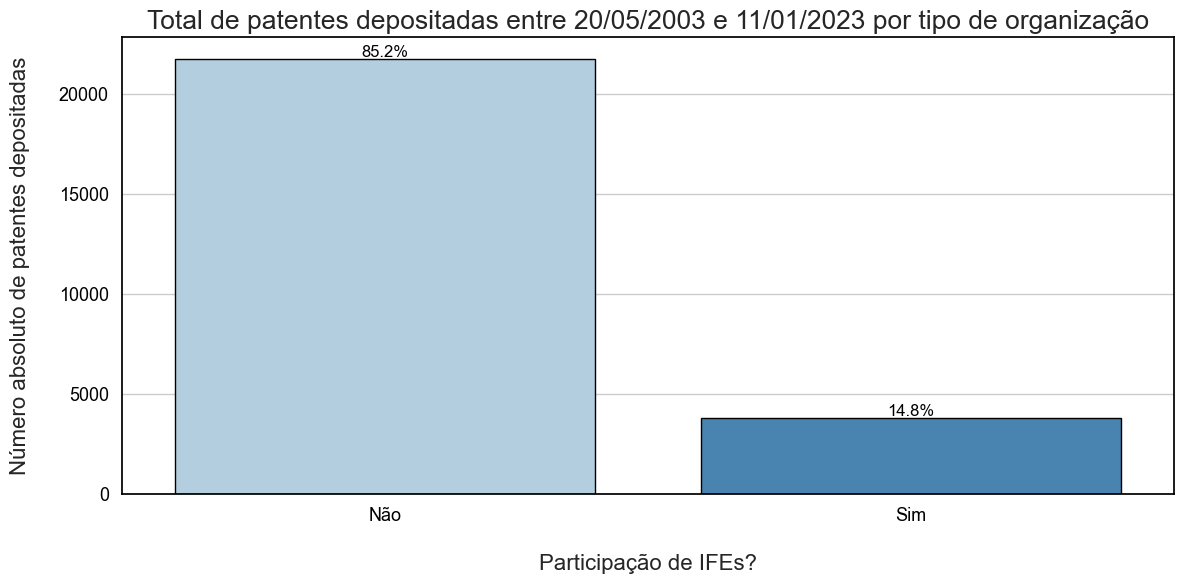

In [6]:
counts = df.groupby('ifes')['ID'].nunique().reset_index()

total = counts['ID'].sum()

counts['Perc'] = (counts['ID'] / total * 100).round(2)

plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")  # Estilo de fundo

barplot = sns.barplot(
    x='ifes', y='ID', hue='ifes', data=counts, 
    palette="Blues", legend=False, edgecolor='black')

for index, row in counts.iterrows():
    barplot.text(row.name, row['ID']+100, f"{row['Perc']}%", color='black', ha="center")

plt.xticks(rotation=0, fontsize=13) 
plt.yticks(fontsize=13)  # Rotacione os rótulos no eixo x para melhor legibilidade
plt.xlabel('\nParticipação de IFEs?', fontsize=16)
plt.ylabel('Número absoluto de patentes depositadas\n', fontsize=16)
plt.title('Total de patentes depositadas entre 20/05/2003 e 11/01/2023 por tipo de organização',
          fontsize=19)

# Personalize os contornos das barras
barplot.spines['top'].set_color('black')
barplot.spines['right'].set_color('black')
barplot.spines['bottom'].set_color('black')
barplot.spines['left'].set_color('black')

# Personalize os ticks dos eixos
barplot.tick_params(axis='x', colors='black')
barplot.tick_params(axis='y', colors='black')

# Mostre o gráfico
plt.tight_layout()
plt.savefig("fig_total_geral_por_tipo_org.png")
plt.show()


### Relação entre a data de publicação da revista e data de depósito de patente

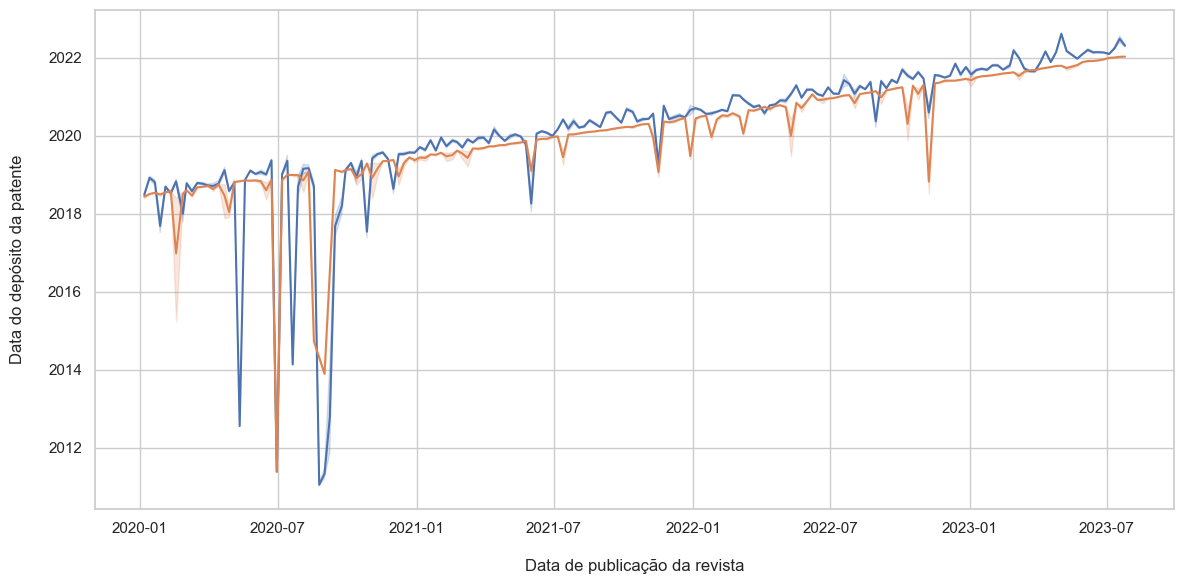

In [7]:
# Crie o gráfico de barras com Seaborn
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")  # Estilo de fundo

# Crie o gráfico de barras com as porcentagens
sns.lineplot(x='data_publicacao', y='data_deposito', hue='ifes', data=df, legend=False)

plt.xticks(rotation=0)  # Rotacione os rótulos no eixo x para melhor legibilidade
plt.xlabel('\nData de publicação da revista')
plt.ylabel('Data do depósito da patente\n')
#plt.title('')

# Mostre o gráfico
plt.tight_layout()
plt.show()


### Patentes depositadas entre 20/05/2003 e 11/01/2023 por data de depósito e segundo participação de IFEs

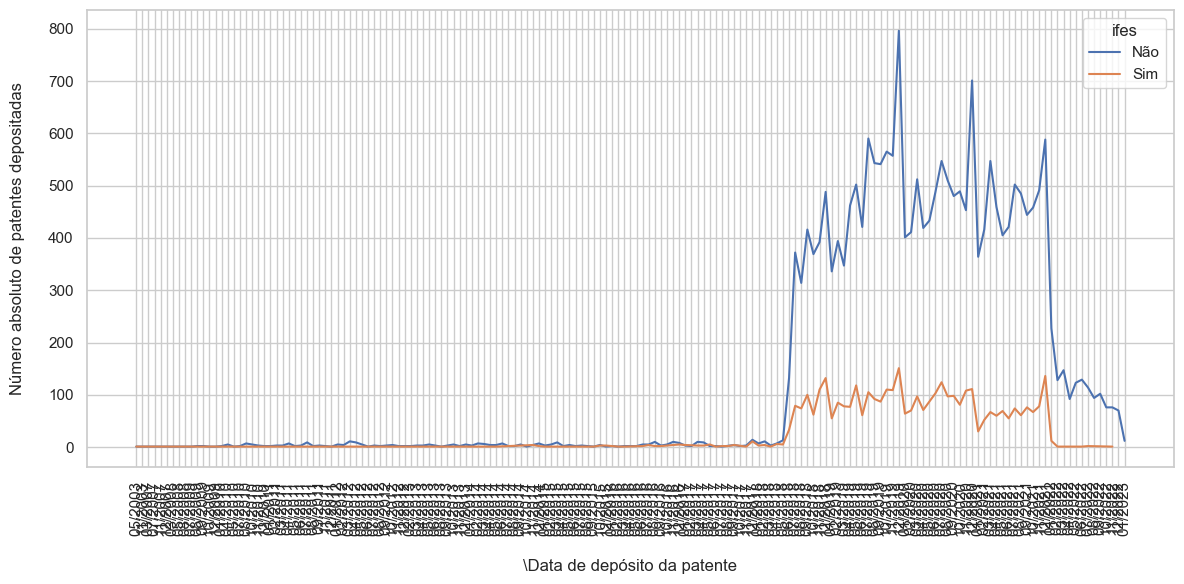

In [8]:
# Agrupe os dados e conte IDs distintos em cada categoria da coluna 'ifes'
counts = df.groupby(['mes_dep', 'ano_dep', 'mes_ano_dep', 'ifes'],observed=True)['ID'].nunique().reset_index()
counts = counts.sort_values(['ano_dep', 'mes_dep', 'ifes']).copy()

# Crie o gráfico de barras com Seaborn
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")  # Estilo de fundo

# Crie o gráfico de barras com as porcentagens
sns.lineplot(x='mes_ano_dep', y='ID', hue='ifes', data=counts)

plt.xticks(rotation=90)  # Rotacione os rótulos no eixo x para melhor legibilidade
plt.xlabel('\n\Data de depósito da patente')
plt.ylabel('Número absoluto de patentes depositadas\n')
#plt.title('')

# Mostre o gráfico
plt.tight_layout()
plt.show()

In [9]:
counts = df.groupby(['mes_dep', 'ano_dep', 'mes_ano_dep', 'ifes'], observed=True)['ID'].nunique().reset_index()
counts = counts.sort_values(['ano_dep', 'mes_dep']).copy()

px.line(counts,
    x='mes_ano_dep', 
    y='ID',
    color='ifes')

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\express\_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



### Patentes depositadas entre 01/01/2018 e 11/01/2023 por data de depósito e segundo participação de IFEs

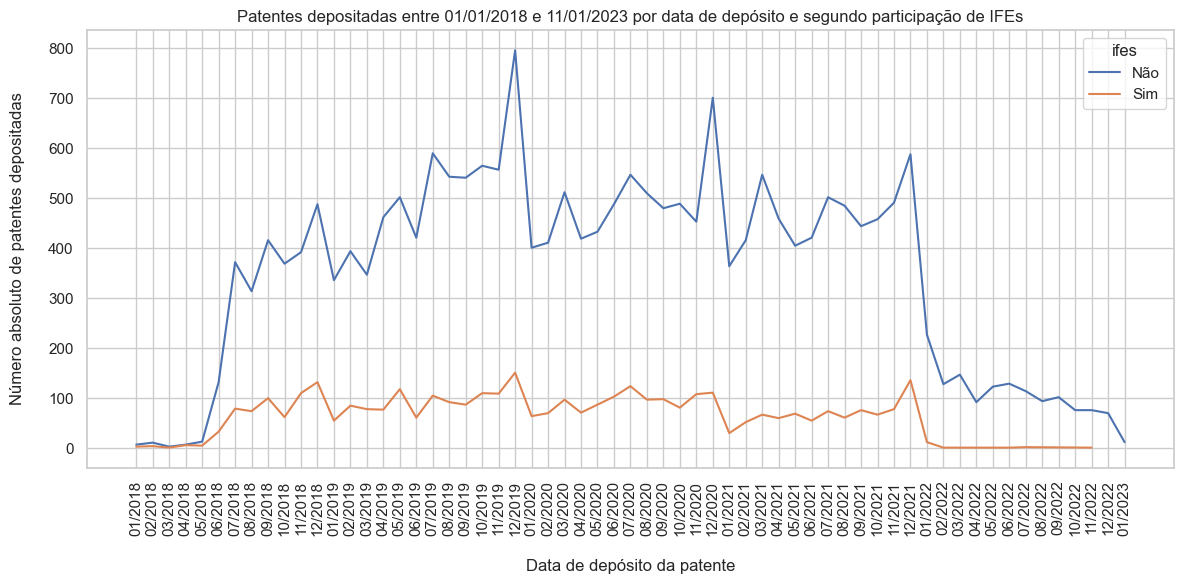

In [10]:
# Agrupe os dados e conte IDs distintos em cada categoria da coluna 'ifes'
counts = df.loc[df['data_deposito'] >= '2018-01-01'].copy()
counts = counts.groupby(['mes_dep', 'ano_dep', 'mes_ano_dep', 'ifes'], observed=True)['ID'].nunique().reset_index()
counts = counts.sort_values(['ano_dep', 'mes_dep']).copy()

# Crie o gráfico de barras com Seaborn
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")  # Estilo de fundo

# Crie o gráfico de barras com as porcentagens
sns.lineplot(x='mes_ano_dep', y='ID', hue='ifes', data=counts)

plt.xticks(rotation=90)  # Rotacione os rótulos no eixo x para melhor legibilidade
plt.xlabel('\nData de depósito da patente')
plt.ylabel('Número absoluto de patentes depositadas\n')
plt.title('Patentes depositadas entre 01/01/2018 e 11/01/2023 por data de depósito e segundo participação de IFEs')

# Mostre o gráfico
plt.tight_layout()
plt.show()

In [11]:
counts = df.loc[df['data_deposito'] >= '2018-01-01'].copy()
counts = counts.groupby(['mes_dep', 'ano_dep', 'mes_ano_dep', 'ifes'], observed=True)['ID'].nunique().reset_index()
counts = counts.sort_values(['ano_dep', 'mes_dep']).copy()

fig=px.line(counts,
    x='mes_ano_dep', y='ID',
    color='ifes', 
    markers=True,
    title='Patentes depositadas entre 01/01/2018 e 11/01/2023 por tipo de organização',
    width=900, height=600,
    labels={ # replaces default labels by column name
                "ID": "Número absoluto de pantentes",  
                "mes_ano_dep": "Data de depósito",
                "ifes": "IFEs"
            },
    color_discrete_map={ # replaces default color mapping by value
                "Não": "blue", "Sim": "red"
            },
    template="simple_white")
fig.update_xaxes(tickangle=-90)
fig.write_html("fig_serie_temp_total_por_tipo_org.html")
fig.show()

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\express\_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



### Distribuição das patentes depositadas por IFEs entre 20/05/2003 e 11/01/2023 por condição de participação

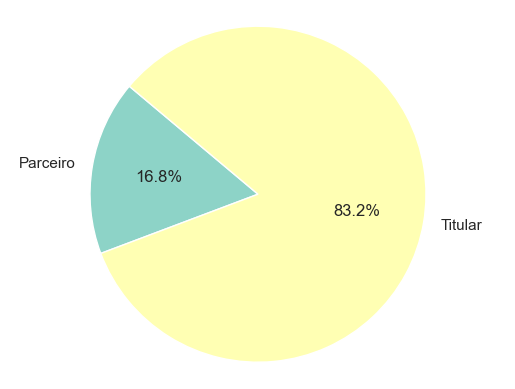

In [12]:
# Agrupe os dados e conte IDs distintos em cada categoria da coluna 'ifes'
counts = df.loc[df['ifes'] == 'Sim'].copy()
counts = counts.groupby('parceria', observed=True)['ID'].nunique().reset_index()

colors = sns.color_palette('Set3')  # Usando uma paleta de cores do Seaborn
labels = ['Parceiro', 'Titular']
# Crie um gráfico de pizza com o Matplotlib
plt.pie(counts['ID'], labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Personalize o gráfico com o Seaborn
sns.set(style='white')
plt.axis('equal')  # Para garantir que o gráfico seja um círculo

# Exiba o gráfico
plt.savefig("fig_total_ifes_por_tipo_partic.png")
plt.show()

### Distribuição das patentes depositadas por IFEs entre 01/01/2018 e 11/01/2023 por data de depósito e segundo condição de participação

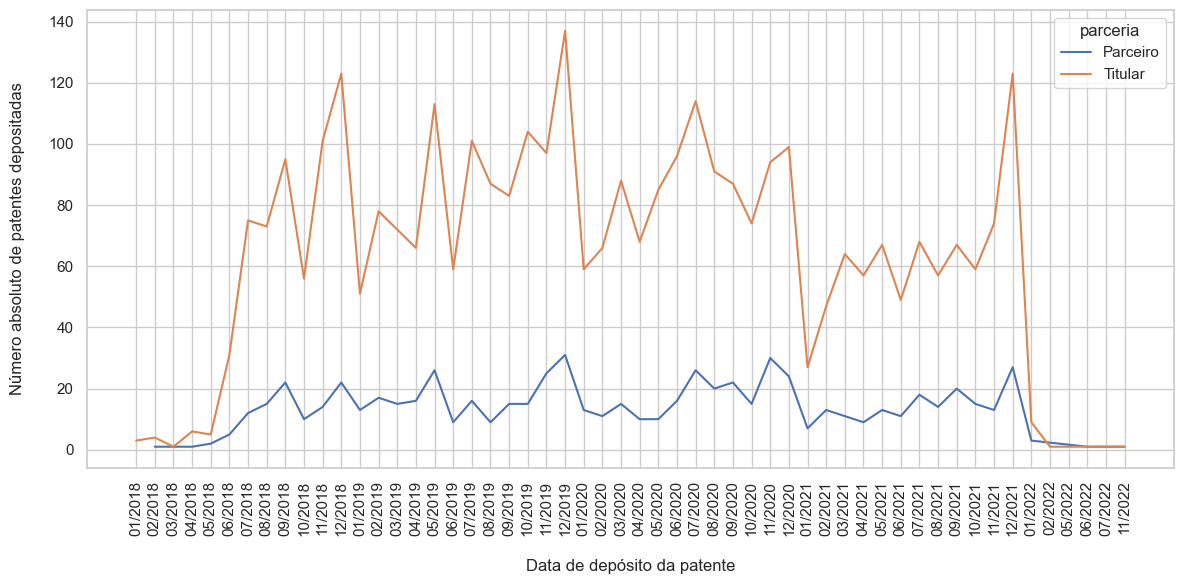

In [13]:
# Agrupe os dados e conte IDs distintos em cada categoria da coluna 'ifes'
counts = df.loc[(df['ifes'] == 'Sim') & (df['data_deposito'] >= '2018-01-01')].copy()
counts = counts.groupby(['mes_dep', 'ano_dep', 'mes_ano_dep', 'parceria'], observed=True)['ID'].nunique().reset_index()
counts = counts.sort_values(['ano_dep', 'mes_dep']).copy()

# Crie o gráfico de barras com Seaborn
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")  # Estilo de fundo

# Crie o gráfico de barras com as porcentagens
sns.lineplot(x='mes_ano_dep', y='ID', hue='parceria', data=counts)

plt.xticks(rotation=90)  # Rotacione os rótulos no eixo x para melhor legibilidade
plt.xlabel('\nData de depósito da patente')
plt.ylabel('Número absoluto de patentes depositadas\n')
#plt.title('')

# Mostre o gráfico
plt.tight_layout()
plt.show()

In [14]:
counts = df.loc[(df['ifes'] == 'Sim') & (df['data_deposito'] >= '2018-01-01')].copy()
counts = counts.groupby(['mes_dep', 'ano_dep', 'mes_ano_dep', 'parceria'], observed=True)['ID'].nunique().reset_index()
counts = counts.sort_values(['ano_dep', 'mes_dep']).copy()

fig=px.line(counts,
    x='mes_ano_dep', y='ID',
    color='parceria', 
    markers=True,
    title='Patentes depositadas entre 01/01/2018 e 11/01/2023 por tipo de participação',
    width=900, height=600,
    labels={ # replaces default labels by column name
                "ID": "Número absoluto de pantentes",  
                "mes_ano_dep": "Data de depósito",
                "parceria": "Tipo de participação"
            },
    color_discrete_map={ # replaces default color mapping by value
                "Titular": "lightgreen", "Parceiro": "darkgreen"
            },
    template="simple_white")
fig.update_xaxes(tickangle=-90)
fig.write_html("fig_serie_temp_total_por_tipo_part.html")
fig.show()

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\express\_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



### Distribuição dos parceiros das IFEs titulares por tipo de organização

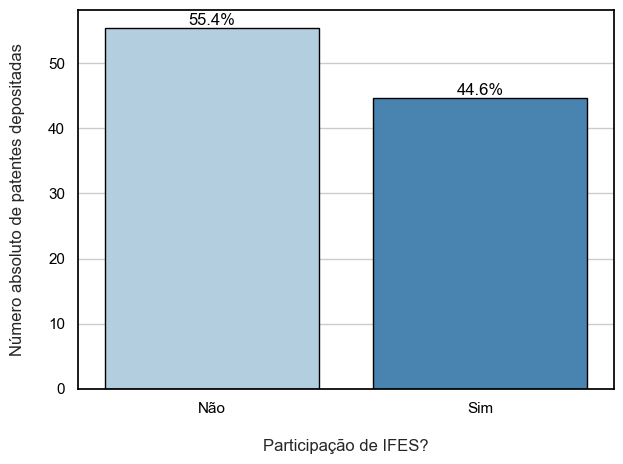

In [15]:
ids = df.loc[(df['ifes'] == 'Sim') & (df['parceria'] == 'Titular')].copy()['ID']
counts = df[df['ID'].isin(ids) & (df['parceria'] != 'Titular')].copy()
grouped_counts1 = counts.groupby('ifes', observed=True).agg(n=('ID', 'nunique')).reset_index()
grouped_counts1['variavel'] = "IFEs"

# Crie o gráfico de barras com Seaborn
#plt.figure(figsize=(12, 6))
#sns.set(style="whitegrid")  # Estilo de fundo

total = grouped_counts1['n'].sum()
grouped_counts1['Perc'] = (grouped_counts1['n'] / total * 100).round(1)

barplot = sns.barplot(x='ifes', y='Perc', hue='ifes', data=grouped_counts1,
    palette="Blues", legend=False, edgecolor='black')

for index, row in grouped_counts1.iterrows():
    barplot.text(row.name, row['Perc']+0.5, f"{row['Perc']}%", color='black', ha="center")

plt.xticks(rotation=0)  # Rotacione os rótulos no eixo x para melhor legibilidade
plt.xlabel('\nParticipação de IFES?')
plt.ylabel('Número absoluto de patentes depositadas\n')
#plt.title('Distribuição das patentes depositadas entre 20/05/2003 e 11/01/2023 por participação de IFEs')

# Personalize os contornos das barras
barplot.spines['top'].set_color('black')
barplot.spines['right'].set_color('black')
barplot.spines['bottom'].set_color('black')
barplot.spines['left'].set_color('black')

# Personalize os ticks dos eixos
barplot.tick_params(axis='x', colors='black')
barplot.tick_params(axis='y', colors='black')

# Mostre o gráfico
plt.tight_layout()
plt.show()

### Distribuição dos parceiros das IFEs e não-IFEs titulares por tipo de organização

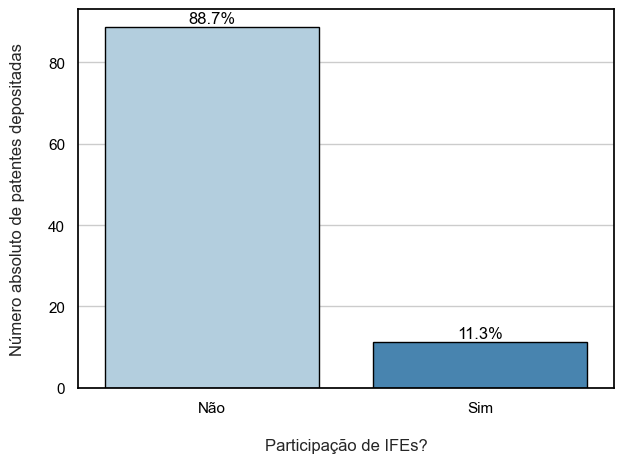

In [16]:
ids = df.loc[(df['ifes'] == 'Não') & (df['parceria'] == 'Titular')].copy()['ID']
counts = df[df['ID'].isin(ids) & (df['parceria'] != 'Titular')].copy()
grouped_counts2 = counts.groupby('ifes', observed=True).agg(n=('ID', 'nunique')).reset_index()
grouped_counts2['variavel'] = "Não IFEs"

# Crie o gráfico de barras com Seaborn
#plt.figure(figsize=(12, 6))
#sns.set(style="whitegrid")  # Estilo de fundo

total = grouped_counts2['n'].sum()
grouped_counts2['Perc'] = (grouped_counts2['n'] / total * 100).round(1)

barplot = sns.barplot(x='ifes', y='Perc', hue='ifes', data=grouped_counts2,
    palette="Blues", legend=False, edgecolor='black')

for index, row in grouped_counts2.iterrows():
    barplot.text(row.name, row['Perc']+1, f"{row['Perc']}%", color='black', ha="center")

plt.xticks(rotation=0)  # Rotacione os rótulos no eixo x para melhor legibilidade
plt.xlabel('\nParticipação de IFEs?')
plt.ylabel('Número absoluto de patentes depositadas\n')
#plt.title('Distribuição das patentes depositadas entre 20/05/2003 e 11/01/2023 por participação de IFEs')

# Personalize os contornos das barras
barplot.spines['top'].set_color('black')
barplot.spines['right'].set_color('black')
barplot.spines['bottom'].set_color('black')
barplot.spines['left'].set_color('black')

# Personalize os ticks dos eixos
barplot.tick_params(axis='x', colors='black')
barplot.tick_params(axis='y', colors='black')

# Mostre o gráfico
plt.tight_layout()
plt.show()

In [17]:
grouped_counts = pd.concat([grouped_counts1, grouped_counts2])

fig=px.bar(grouped_counts,
    x='ifes', y='n',
    color='ifes', 
    facet_col= 'variavel',
    
    title='Distribuição dos parceiros das IFEs e não-IFEs por tipo de organização',
    width=900, height=600,
    labels={ # replaces default labels by column name
            "variavel": "Tipo de organização do titular",  
            "ifes": "IFEs"
            },
    color_discrete_map={ # replaces default color mapping by value
                "Não": "lightgreen", "Sim": "darkgreen"
            },
    template="simple_white")
fig.update_xaxes(tickangle=0)
fig.update_layout(showlegend=False)
fig.write_html("fig_total_tit_e_parc_por_tipo_org.html")
fig.show()

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\express\_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

